In [31]:
#imports

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pickle
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [6]:
#global variables 

target = pd.DataFrame()
predictors = pd.DataFrame()
tree_filename = 'titanic_tree.sav'
knn_filename='titanic_knn.sav'

In [9]:

def prepare_data():

    df = pd.read_csv("C:\\Users\\user\\Downloads\\titanic\\train.csv")
                     
    def get_title(name):
        if '.' in name:
            return name.split(',')[1].split('.')[0].strip()
        else:
            return 'Unknown'

    # A list with the all the different titles
    titles = sorted(set([x for x in df.Name.map(lambda x: get_title(x))]))


    # Normalize the titles
    def replace_titles(x):
        title = x['Title']
        if title in ['Capt', 'Col', 'Major']:
            return 'Officer'
        elif title in ["Jonkheer","Don",'the Countess', 'Dona', 'Lady',"Sir"]:
            return 'Royalty'
        elif title in ['the Countess', 'Mme', 'Lady']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms']:
            return 'Miss'
        else:
            return title
    
    # Lets create a new column for the titles
    df['Title'] = df['Name'].map(lambda x: get_title(x))
     
    # And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
    df['Title'] = df.apply(replace_titles, axis=1)


    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna("S", inplace=True)
    df.drop("Cabin", axis=1, inplace=True)
    df.drop("Ticket", axis=1, inplace=True)
    df.drop("Name", axis=1, inplace=True)
    df.Sex.replace(('male','female'), (0,1), inplace = True)
    df.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
    df.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace = True)


    predictors = df.drop(['Survived', 'PassengerId'], axis=1)
    target = df["Survived"]
    return predictors,target

predictors,target=prepare_data()

In [14]:
def tree_model(predictors,target):
    
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.30, random_state = 0)
    features = predictors.columns
    
    clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
    clf= clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # save the tree model 
    filename = 'titanic_tree.sav'
    pickle.dump(clf, open(filename, 'wb'))
    
    #return accuracy 
    return metrics.accuracy_score(y_test, y_pred)

tree_model(predictors,target)

0.8059701492537313

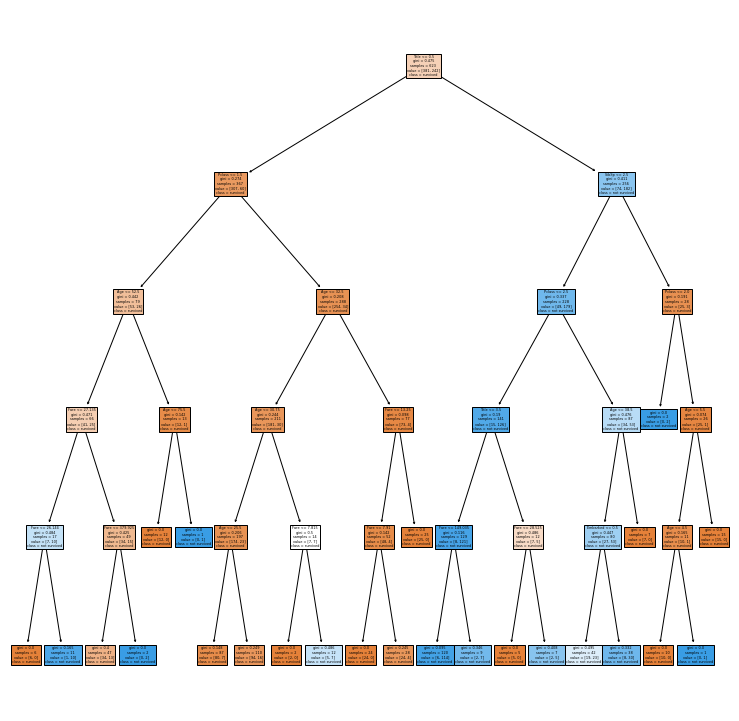

In [17]:
def print_tree(predictors):
    
    #load the tree model 
    filename = 'titanic_tree.sav'
    clf = pickle.load(open(filename, 'rb'))
    #print the tree 
    features = predictors.columns
    plt.figure(figsize=[13, 13])
    plot_tree(clf, feature_names=features, class_names=['survived', 'not survived'], filled=True)
    plt.show()
    
print_tree(predictors)

In [30]:
def predict_by_tree(Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title): 
    x=[[Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title]]
    filename = 'titanic_tree.sav'
    clf = pickle.load(open(filename, 'rb'))
    prediction=clf.predict(x)
    return (prediction[0])

predict_by_tree(0,1,0,0,0,0,1,0)
    

0

In [34]:
def knn_model(predictors,target):
    
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.30, random_state = 0)
    features = predictors.columns
    
    def find_best_k():
        k_range = range(3,21)
        scores = {}
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(x_train, y_train)
            y_pred = knn.predict(x_test)
            scores[k] = metrics.accuracy_score(y_test, y_pred)
    
        #find the k for the max score - option 1 

        return(max(scores,key=scores.get))
    
    print (find_best_k())
    
    knn = KNeighborsClassifier(n_neighbors = find_best_k())
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    # save the tree model 
    knn_filename='titanic_knn.sav'
    pickle.dump(knn, open(knn_filename, 'wb'))
    
    #return accuracy 
    return metrics.accuracy_score(y_test, y_pred)
    
knn_model(predictors,target)


17


0.7611940298507462

In [36]:
def predict_by_knn(Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title): 
    x=[[Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title]]
    knn_filename = 'titanic_knn.sav'
    knn = pickle.load(open(knn_filename, 'rb'))
    prediction=knn.predict(x)
    return (prediction[0])

predict_by_knn(0,1,0,0,0,0,1,0)
    

1

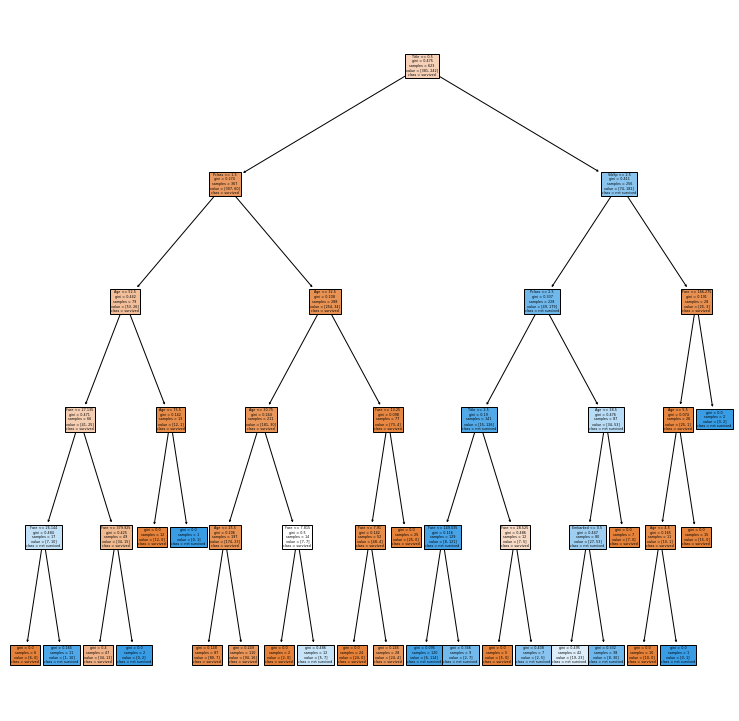

17


In [38]:
def main():

    target = pd.DataFrame()
    predictors = pd.DataFrame()
    tree_filename = 'titanic_tree.sav'
    knn_filename='titanic_knn.sav'

    predictors,target=prepare_data()
    tree_model(predictors,target)
    print_tree(predictors)
    predict_by_tree(0,1,0,0,0,0,1,0)
    knn_model(predictors,target)
    predict_by_knn(0,1,0,0,0,0,1,0)
    
main()